In [1]:
import gym
import cv2
import numpy as np
from PIL import Image

In [2]:
env = gym.make('Breakout-v0')

In [3]:
env.reset()
env.render()

True

In [4]:
next_state, reward, done, info = env.step(action=env.action_space.sample())
env.render()

True

# to black and white

In [5]:
image_size = 84, 84

def downsample(frame: np.ndarray, x: int=8, y: int=14) -> np.ndarray:
    """
    Down-sample the given frame from RGB to B&W with a reduced size.

    Args:
        frame: the frame to down-sample

    Returns:
        a down-sample B&W frame

    """
    # convert the frame from RGB to gray scale
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # crop the image
    frame = frame[2*y:frame.shape[0] - y, x:frame.shape[1] - x]
    
    # zero out specific colors
    # 142 is the generic gray color
    frame[frame == 142] = 0

    # resize the frame to the expected shape
    frame = cv2.resize(frame, image_size)
    # normalize the image to floating point in [0, 1]
    frame = frame / 255.0

    return frame

In [6]:
def matrix_to_image(image: np.ndarray, channel_range: tuple=(0, 255)) -> Image:
    """
    Convert the input matrix to an image.
    Args:
        image: the matrix of shape [height, width, channel] to convert
        channel_range: the range to clip the channel values to (inclusive)
    Returns:
        an image from the pixels in the image array
    """
    # clip the values in the image to the boundary [0, 255]. This is the
    # legal range for channel values. Image uses a method called 'to bytes'
    # to compress the input array into a simpler binary representation for
    # graphics processing. As such, convert the type to a single byte to
    # satisfy this constraint.
    image = np.clip(image, *channel_range).astype('uint8')

    return Image.fromarray(image)

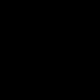

In [7]:
matrix_to_image(downsample(next_state))

# Inline

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [9]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.axis('off')

    display.clear_output(wait=True)
    plt.show()

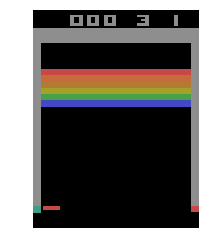

In [10]:
for i in range(100):
    next_state, reward, done, info = env.step(action=env.action_space.sample())
    show_state(env)